# **Imoporting required Libraries!**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e12/sample_submission.csv
/kaggle/input/playground-series-s3e12/train.csv
/kaggle/input/playground-series-s3e12/test.csv


**Importing the model**

In [2]:
data=pd.read_csv('/kaggle/input/playground-series-s3e12/train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


**So from above info**
* there is no null values in dataset
* the column 'id' is not required!


In [3]:
data.drop('id',axis=1,inplace=True)

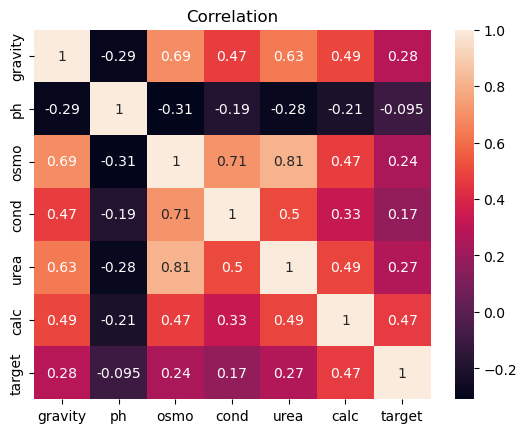

In [4]:
plt.figure()
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation")
plt.show()

# **So from above relation map we can observe everything had a effect on target column**

In [5]:
data['target'].value_counts()

0    230
1    184
Name: target, dtype: int64

**Since it is a classification problem**
We are going to use
* Logistic Regression
* KNN
* SVM
* Gradient Booster
* Decision Tree
* Random Forest

In [6]:
models={"Logistic Regression":LogisticRegression(),"Random Forest":RandomForestClassifier(n_estimators=40),"Gradient Booster":GradientBoostingClassifier(n_estimators=80),
       "Decision Tree":DecisionTreeClassifier(),"SVM":SVC(kernel='linear'),"KNeighbors":KNeighborsClassifier(n_neighbors=30)}

# **The below functons are involved in iterating through models and printing its scores!**

In [7]:
def Score(X,y,model):
#     print("Accuracy Score:",accuracy_score(y,model.predict(X)))
    return accuracy_score(y,model.predict(X))

In [8]:
def getScore(X,y,models):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    modelAndScore={}
    for i in models.keys():
        print(i)
        model=models[i]
        model.fit(X_train,y_train)
        print("Training Score:",Score(X_train,y_train,model))
        print("Testing Score:",Score(X_test,y_test,model))
        modelAndScore[i]=Score(X_test,y_test,model)
        print("-"*40)
    return modelAndScore

In [9]:
X=data.drop('target',axis=1)
y=data['target']
modelAndScore=getScore(X,y,models)

Logistic Regression
Training Score: 0.7341389728096677
Testing Score: 0.6867469879518072
----------------------------------------
Random Forest
Training Score: 1.0
Testing Score: 0.7469879518072289
----------------------------------------
Gradient Booster
Training Score: 0.918429003021148
Testing Score: 0.7469879518072289
----------------------------------------
Decision Tree
Training Score: 1.0
Testing Score: 0.7349397590361446
----------------------------------------
SVM
Training Score: 0.7341389728096677
Testing Score: 0.7349397590361446
----------------------------------------
KNeighbors
Training Score: 0.622356495468278
Testing Score: 0.6024096385542169
----------------------------------------


**We are using matplotlib library as plt and plotting diagram below!**

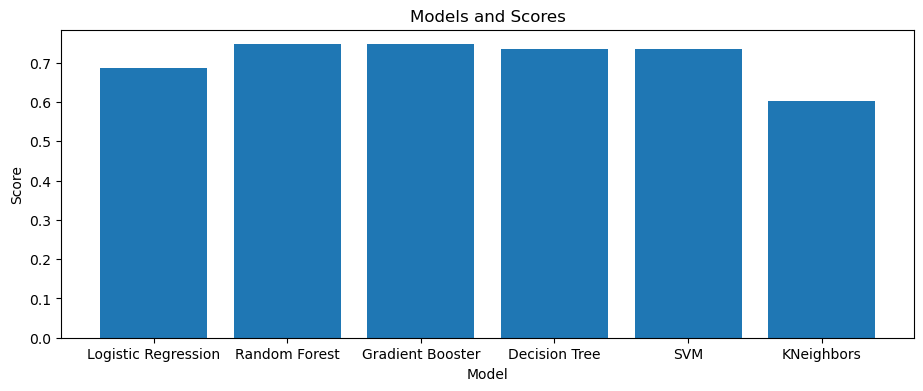

In [10]:
plt.figure(figsize=(11,4))
plt.bar(modelAndScore.keys(),modelAndScore.values())
plt.title("Models and Scores")
plt.xlabel("Model")
plt.ylabel("Score")
plt.show()

# **From the above chart,SVM has more accuracy.So, we are using SVM as our model**

In [11]:
model=models["SVM"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model.fit(X_train,y_train)

SVC(kernel='linear')

# **Importing Test Data**

In [12]:
testData=pd.read_csv('/kaggle/input/playground-series-s3e12/test.csv')

In [13]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       276 non-null    int64  
 1   gravity  276 non-null    float64
 2   ph       276 non-null    float64
 3   osmo     276 non-null    int64  
 4   cond     276 non-null    float64
 5   urea     276 non-null    int64  
 6   calc     276 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 15.2 KB


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  414 non-null    float64
 1   ph       414 non-null    float64
 2   osmo     414 non-null    int64  
 3   cond     414 non-null    float64
 4   urea     414 non-null    int64  
 5   calc     414 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 19.5 KB


In [15]:
id=testData['id']
testData.drop('id',axis=1,inplace=True)
submission=pd.DataFrame()
submission['id']=id
# submission=pd.DataFrame(model.predict(testData),columns=['target'])
submission['target']=model.predict(testData)
submission.head()

,id,target
0,414,0
1,415,0
2,416,1
3,417,0
4,418,0


In [16]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      276 non-null    int64
 1   target  276 non-null    int64
dtypes: int64(2)
memory usage: 4.4 KB


# **Creating the csv file for submission without index(ie index=False)**

In [17]:
submission.to_csv("submission.csv",index=False)